## Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/census_income.csv')

In [3]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Creating a copy of the dataframe just in case

In [5]:
df_copy = df.copy()

## Converting the columns into numerical format and understanding every column

Age

In [6]:
df['Age'].value_counts()

,count
Age,
36,898
31,888
34,886
23,877
35,876
...,...
83,6
88,3
85,3


In [7]:
df['Age'].unique()

array([50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43, 54,
       35, 59, 56, 19, 39, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87])

Workclass

In [8]:
df['Workclass'].value_counts()

,count
Workclass,
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
?,1836
State-gov,1297
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


Comments - We will segregate the data into 3 types - Government, Private and Not-working

In [9]:
def map_workclass(workclass):
    if workclass in [' Private', ' Self-emp-not-inc', ' Self-emp-inc']:
        return 'Private'
    elif workclass in [' Local-gov', ' State-gov', ' Federal-gov']:
        return 'Government'
    elif workclass in [' Without-pay', ' Never-worked', ' ?']:
        return 'Not-earning'

df['Workclass_grouped'] = df['Workclass'].apply(map_workclass)

In [10]:
df['Workclass_grouped'].value_counts()

,count
Workclass_grouped,
Private,26353
Government,4350
Not-earning,1857


In [11]:
df['Workclass_grouped'].unique()

array(['Private', 'Government', 'Not-earning'], dtype=object)

In [12]:
df['Workclass_grouped'] = df['Workclass_grouped'].map({'Private': 2, 'Government': 1, 'Not-earning': 0})

In [13]:
df.drop('Workclass', axis=1, inplace=True)

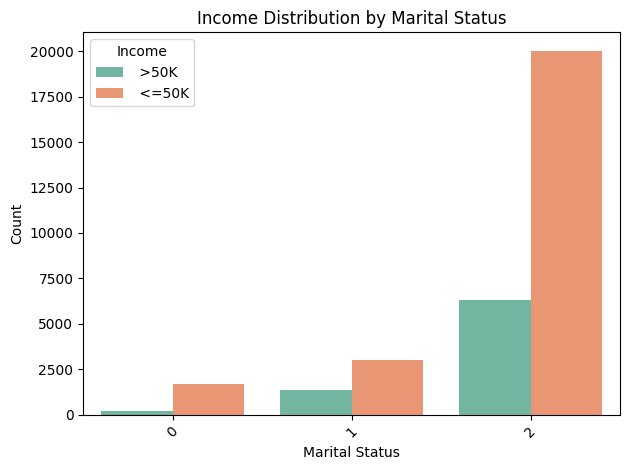

In [14]:
sns.countplot(data=df, x='Workclass_grouped', hue='Income', palette='Set2')

plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Income Distribution by Marital Status')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Fnlwgt

In [15]:
df['Fnlwgt'].value_counts()

,count
Fnlwgt,
164190,13
203488,13
123011,13
148995,12
126675,12
...,...
325573,1
140176,1
318264,1


In [16]:
df['Fnlwgt'].unique()

array([ 83311, 215646, 234721, ...,  34066,  84661, 257302])

In [17]:
len(df['Fnlwgt'].unique())

21647

Comments since this column has extreme amount of unique values it seems that the column won't be playing a great role in prediction. As of now we will get rid of the column.

In [18]:
df.drop('Fnlwgt', axis=1, inplace=True)

Education

In [19]:
df['Education'].value_counts()

,count
Education,
HS-grad,10501
Some-college,7291
Bachelors,5354
Masters,1723
Assoc-voc,1382
11th,1175
Assoc-acdm,1067
10th,933
7th-8th,646


In [20]:
df['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

Comments - Since the Education Num column maintains the ordinal relationship between the degrees in the education column and is just the numerical representation of the same, we will get rid of the Education column.

In [21]:
df.drop('Education', axis=1, inplace=True)

Education Num

In [22]:
df['Education_num'].value_counts()

,count
Education_num,
9,10501
10,7291
13,5354
14,1723
11,1382
7,1175
12,1067
6,933
4,646


Marital Status

In [23]:
df['Marital_status'].value_counts()

,count
Marital_status,
Married-civ-spouse,14976
Never-married,10682
Divorced,4443
Separated,1025
Widowed,993
Married-spouse-absent,418
Married-AF-spouse,23


In [24]:
df['Marital_status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

Comments- As of now we will use label encoding to encode the values

In [25]:
df['Marital_status'] = df['Marital_status'].map({' Married-civ-spouse': 0, ' Never-married': 1, ' Divorced': 2, ' Separated': 3, ' Widowed': 4, ' Married-spouse-absent': 5, ' Married-AF-spouse': 6})

In [26]:
df['Marital_status'].value_counts()

,count
Marital_status,
0,14976
1,10682
2,4443
3,1025
4,993
5,418
6,23


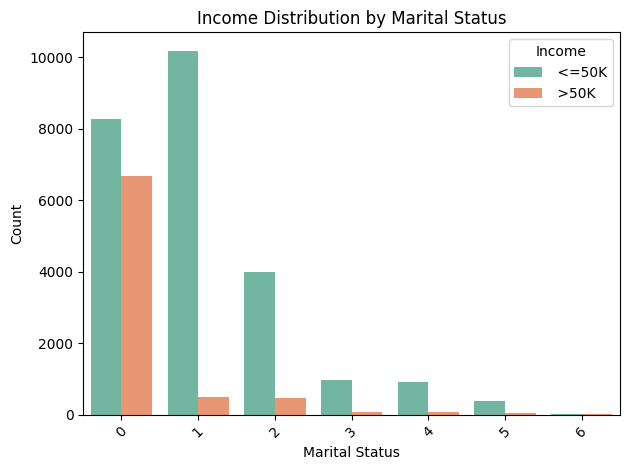

In [27]:
sns.countplot(data=df, x='Marital_status', hue='Income', palette='Set2')

plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Income Distribution by Marital Status')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Occupation

In [28]:
df['Occupation'].value_counts()

,count
Occupation,
Prof-specialty,4140
Craft-repair,4099
Exec-managerial,4066
Adm-clerical,3769
Sales,3650
Other-service,3295
Machine-op-inspct,2002
?,1843
Transport-moving,1597


In [29]:
df['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

Comments - We will use frequency encoding for this column

In [30]:
df['Occupation'] = df['Occupation'].map({' Exec-managerial': 4066, ' Handlers-cleaners': 1370, ' Prof-specialty': 4140,
       ' Other-service': 3295, ' Adm-clerical': 3769, ' Sales': 3650, ' Craft-repair': 4099,
       ' Transport-moving': 1597, ' Farming-fishing': 994, ' Machine-op-inspct': 2002,
       ' Tech-support': 928, ' ?': 1843, ' Protective-serv': 649, ' Armed-Forces': 9,
       ' Priv-house-serv': 149})

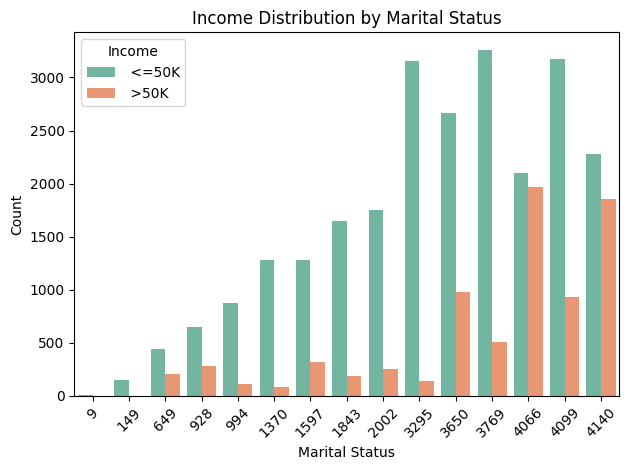

In [31]:
sns.countplot(data=df, x='Occupation', hue='Income', palette='Set2')

plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Income Distribution by Marital Status')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Relationship

In [32]:
df['Relationship'].value_counts()

,count
Relationship,
Husband,13193
Not-in-family,8304
Own-child,5068
Unmarried,3446
Wife,1568
Other-relative,981


In [33]:
df['Relationship'].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

Comments - We will use Categorical encoding for the relationship status

In [34]:
df['Relationship'] = df['Relationship'].map({' Husband': 0, ' Wife': 1, ' Own-child': 2, ' Not-in-family': 3, ' Other-relative': 4, ' Unmarried': 5})

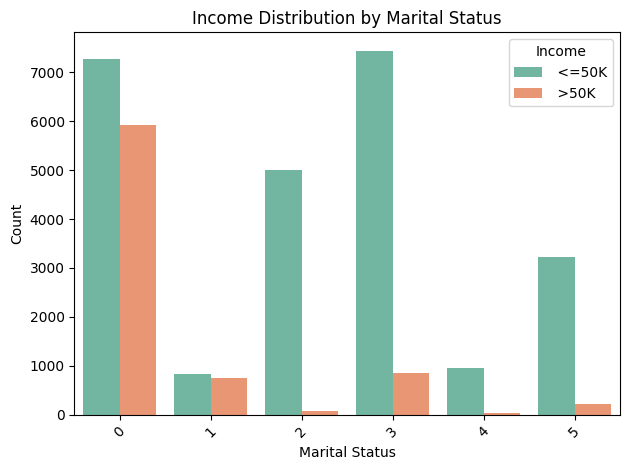

In [35]:
sns.countplot(data=df, x='Relationship', hue='Income', palette='Set2')

plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Income Distribution by Marital Status')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Race

In [36]:
df['Race'].value_counts()

,count
Race,
White,27815
Black,3124
Asian-Pac-Islander,1039
Amer-Indian-Eskimo,311
Other,271


In [37]:
df['Race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

Comments - For now we will use categorical encoding.

In [38]:
df['Race'] = df['Race'].map({' White': 0, ' Black': 1, ' Asian-Pac-Islander': 2, ' Amer-Indian-Eskimo': 3, ' Other': 4})

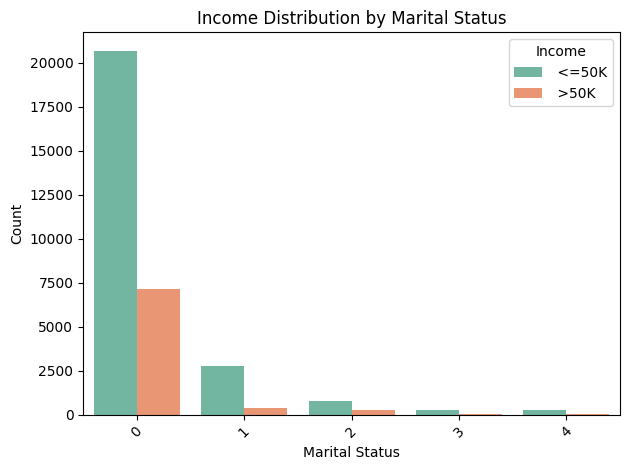

In [39]:
sns.countplot(data=df, x='Race', hue='Income', palette='Set2')

plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Income Distribution by Marital Status')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Sex

In [40]:
df['Sex'].value_counts()

,count
Sex,
Male,21789
Female,10771


In [41]:
df['Sex'].unique()

array([' Male', ' Female'], dtype=object)

In [42]:
df['Sex'] = df['Sex'].map({' Male': 0, ' Female': 1})

Native Country

In [43]:
df['Native_country'].value_counts()

,count
Native_country,
United-States,29169
Mexico,643
?,583
Philippines,198
Germany,137
Canada,121
Puerto-Rico,114
El-Salvador,106
India,100


In [44]:
len(df['Native_country'].unique())

42

Comments - Since there are too many countries to handle we will convert contries into continents and drop the native country column, reason being the data will be one-sided, as we can see around 30k people in the dataset are from United-States. Whereas people from other countries are very less in number.

In [45]:
country_to_continent = {
    ' United-States': 'North America',
    ' Mexico': 'North America',
    ' Canada': 'North America',
    ' El-Salvador': 'North America',
    ' Puerto-Rico': 'North America',
    ' Cuba': 'North America',
    ' Dominican-Republic': 'North America',
    ' Guatemala': 'North America',
    ' Honduras': 'North America',
    ' Jamaica': 'North America',
    ' Trinadad&Tobago': 'North America',
    ' Outlying-US(Guam-USVI-etc)': 'North America',

    ' Germany': 'Europe',
    ' England': 'Europe',
    ' Italy': 'Europe',
    ' Portugal': 'Europe',
    ' Poland': 'Europe',
    ' Greece': 'Europe',
    ' France': 'Europe',
    ' Ireland': 'Europe',
    ' Scotland': 'Europe',
    ' Holand-Netherlands': 'Europe',
    ' Yugoslavia': 'Europe',
    ' Hungary': 'Europe',

    ' Philippines': 'Asia',
    ' India': 'Asia',
    ' China': 'Asia',
    ' Vietnam': 'Asia',
    ' Japan': 'Asia',
    ' Taiwan': 'Asia',
    ' Iran': 'Asia',
    ' Cambodia': 'Asia',
    ' Laos': 'Asia',
    ' Thailand': 'Asia',
    ' Hong': 'Asia',

    ' Columbia': 'South America',
    ' Peru': 'South America',
    ' Ecuador': 'South America',

    ' South': 'Other',
    ' ?': 'Other',
    ' Haiti': 'Other',
    ' Nicaragua': 'Other',
}

df['Continent'] = df['Native_country'].map(country_to_continent)


In [46]:
df['Continent'] = df['Continent'].map({'North America': 0, 'Europe': 1, 'Asia': 2, 'South America': 3, 'Other': 4})

In [47]:
df.drop('Native_country', axis=1, inplace=True)

Income

In [48]:
df['Income'].value_counts()

,count
Income,
<=50K,24719
>50K,7841


In [49]:
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [50]:
df['Income'] = df['Income'].map({' <=50K': 0, ' >50K': 1})

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                32560 non-null  int64
 1   Education_num      32560 non-null  int64
 2   Marital_status     32560 non-null  int64
 3   Occupation         32560 non-null  int64
 4   Relationship       32560 non-null  int64
 5   Race               32560 non-null  int64
 6   Sex                32560 non-null  int64
 7   Capital_gain       32560 non-null  int64
 8   Capital_loss       32560 non-null  int64
 9   Hours_per_week     32560 non-null  int64
 10  Income             32560 non-null  int64
 11  Workclass_grouped  32560 non-null  int64
 12  Continent          32560 non-null  int64
dtypes: int64(13)
memory usage: 3.2 MB


## Setting aside the test set from the train set

In [52]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, stratify= df['Income'], random_state=42)

In [53]:
train_set.shape

(26048, 13)

In [54]:
test_set.shape

(6512, 13)

## Visualization and Descriptions

In [55]:
train_set.describe()

,Age,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_grouped,Continent
count,26048.000000,26048.000000,26048.000000,26048.000000,26048.000000,26048.000000,26048.000000,26048.000000,26048.000000,26048.000000,26048.000000,26048.000000,26048.000000
mean,38.605037,10.082386,0.886863,3161.146959,1.773802,0.221130,0.331619,1058.821291,89.540310,40.477234,0.240825,1.749770,0.159513
std,13.623556,2.577975,1.100920,1140.388767,1.716311,0.626647,0.470804,7293.555063,408.358961,12.344411,0.427592,0.550062,0.687694
min,17.000000,1.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,28.000000,9.000000,0.000000,2002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,2.000000,0.000000
50%,37.000000,10.000000,1.000000,3650.000000,2.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,2.000000,0.000000
75%,48.000000,12.000000,1.000000,4099.000000,3.000000,0.000000,1.000000,0.000000,0.000000,45.000000,0.000000,2.000000,0.000000
max,90.000000,16.000000,6.000000,4140.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000,2.000000,4.000000


This plot lets us understand that the middle age groups are earning more money than lower or higher age groups.

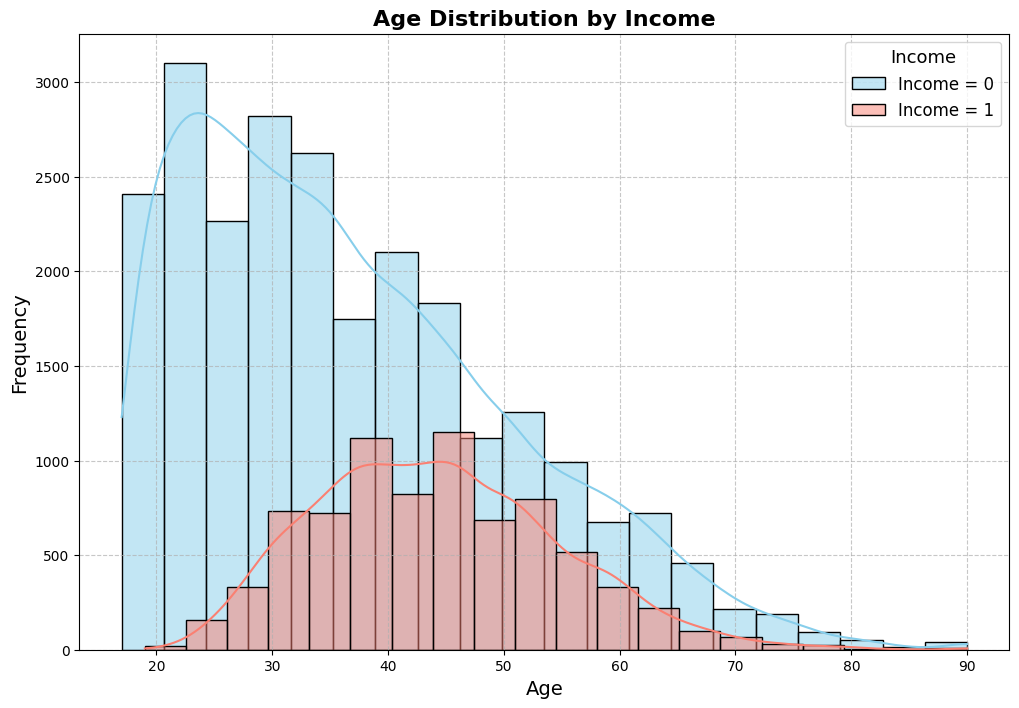

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.histplot(df[df['Income'] == 0]['Age'], bins=20, color='skyblue', label='Income = 0', kde=True)
sns.histplot(df[df['Income'] == 1]['Age'], bins=20, color='salmon', label='Income = 1', kde=True)

plt.title('Age Distribution by Income', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Income', title_fontsize='13', fontsize='12')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


A lower ratio in the below graph indicates higher number of income in that age group. People between 40-60 have a higher  average earning than other age groups.

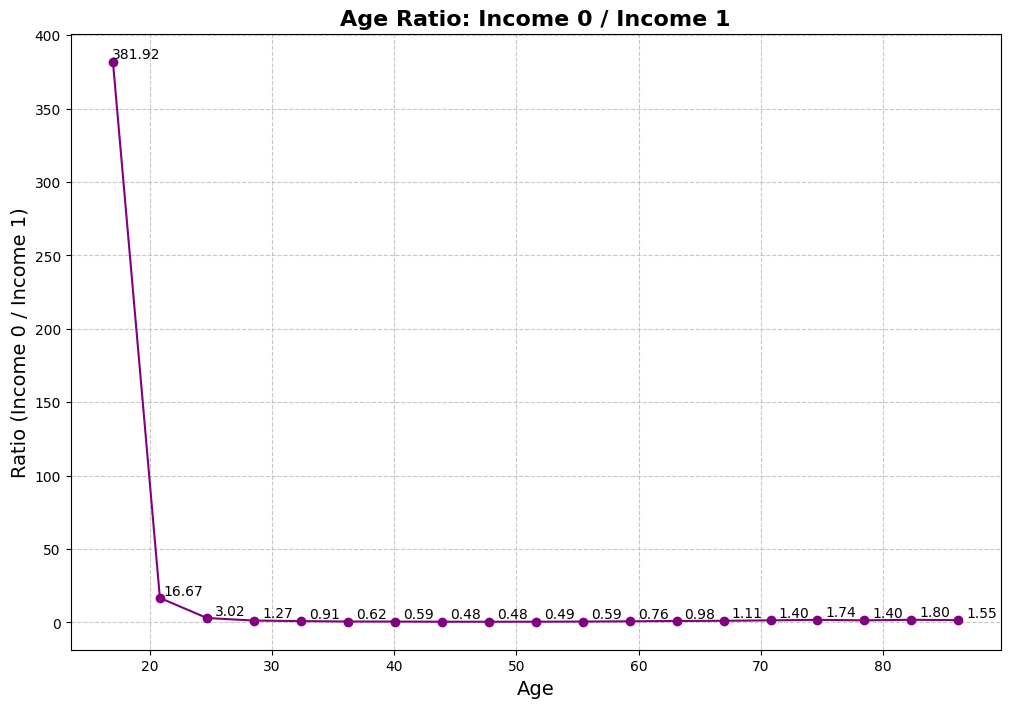

In [57]:
import numpy as np
import matplotlib.pyplot as plt

bins = np.linspace(df['Age'].min(), df['Age'].max(), 20)
hist_income_0, _ = np.histogram(df[df['Income'] == 0]['Age'], bins=bins, density=True)
hist_income_1, _ = np.histogram(df[df['Income'] == 1]['Age'], bins=bins, density=True)

hist_income_1[hist_income_1 == 0] = 1e-10
ratio = hist_income_0 / hist_income_1

plt.figure(figsize=(12, 8))
plt.plot(bins[:-1], ratio, marker='o', linestyle='-', color='purple')
plt.title('Age Ratio: Income 0 / Income 1', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Ratio (Income 0 / Income 1)', fontsize=14)

for i, val in enumerate(ratio):
    plt.text(bins[i] + (bins[i + 1] - bins[i]) / 2, val, f'{val:.2f}',
             ha='center', va='bottom', fontsize=10, color='black')

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


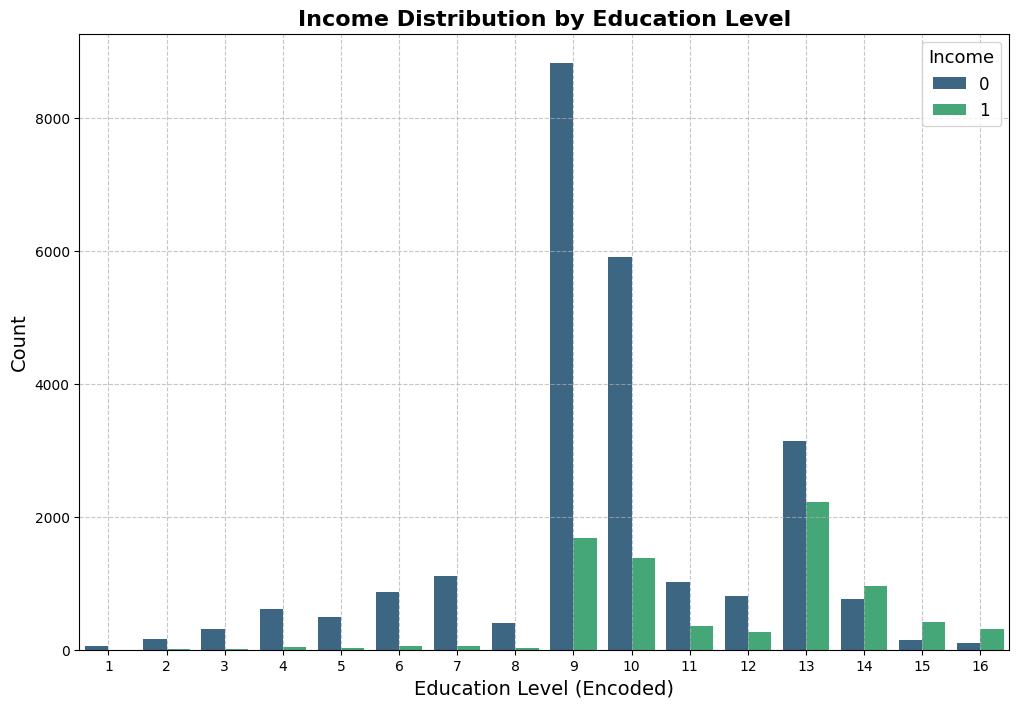

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.countplot(x='Education_num', hue='Income', data=df, palette='viridis')
plt.title('Income Distribution by Education Level', fontsize=16, fontweight='bold')
plt.xlabel('Education Level (Encoded)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Income', title_fontsize='13', fontsize='12')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


The ratio of income 0 / income 1 seems to drop with education level, which is logical as people with higher education levels tend to get a higher paying job.

<ipython-input-59-87b5f367ca2b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ratio.index, y=ratio.values, palette='viridis')


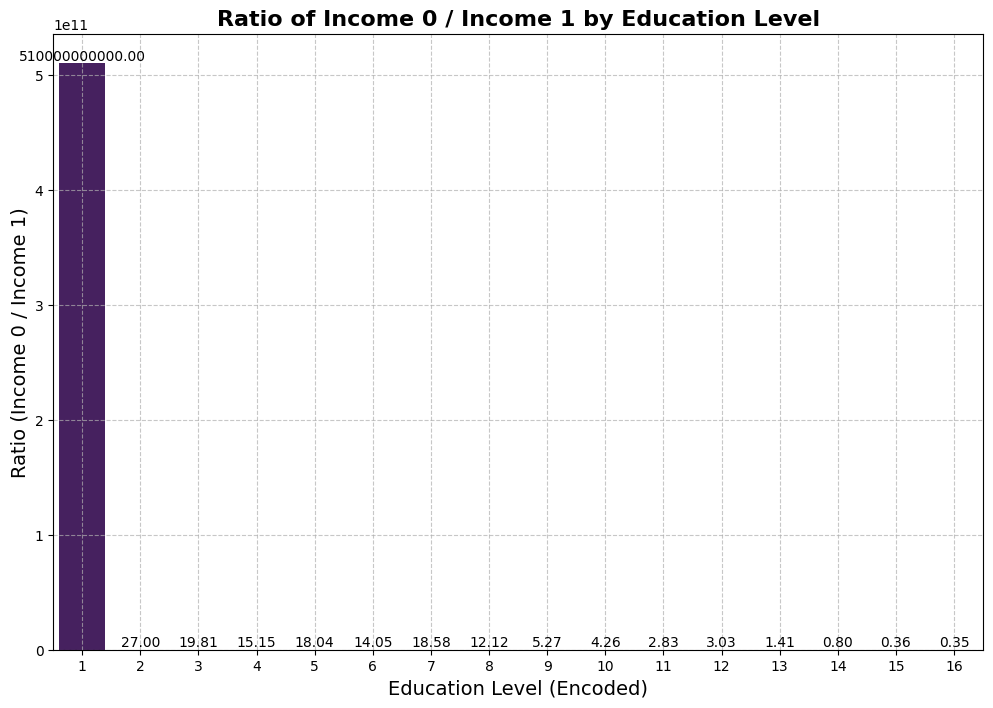

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

income_counts = df.groupby(['Education_num', 'Income']).size().unstack(fill_value=0)

income_counts[1] = income_counts[1].replace(0, 1e-10)
ratio = income_counts[0] / income_counts[1]

plt.figure(figsize=(12, 8))
sns.barplot(x=ratio.index, y=ratio.values, palette='viridis')

for i, val in enumerate(ratio.values):
    plt.text(i, val, f'{val:.2f}', ha='center', va='bottom', fontsize=10, color='black')

plt.title('Ratio of Income 0 / Income 1 by Education Level', fontsize=16, fontweight='bold')
plt.xlabel('Education Level (Encoded)', fontsize=14)
plt.ylabel('Ratio (Income 0 / Income 1)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


<ipython-input-60-5e9bbedb7a67>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Education_num', data=df, palette='viridis')


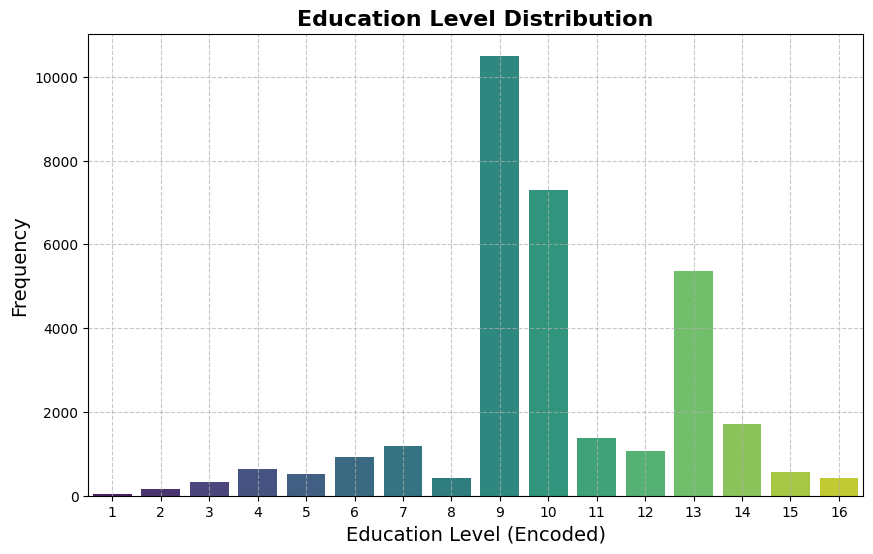

In [60]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Education_num', data=df, palette='viridis')
plt.title('Education Level Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Education Level (Encoded)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


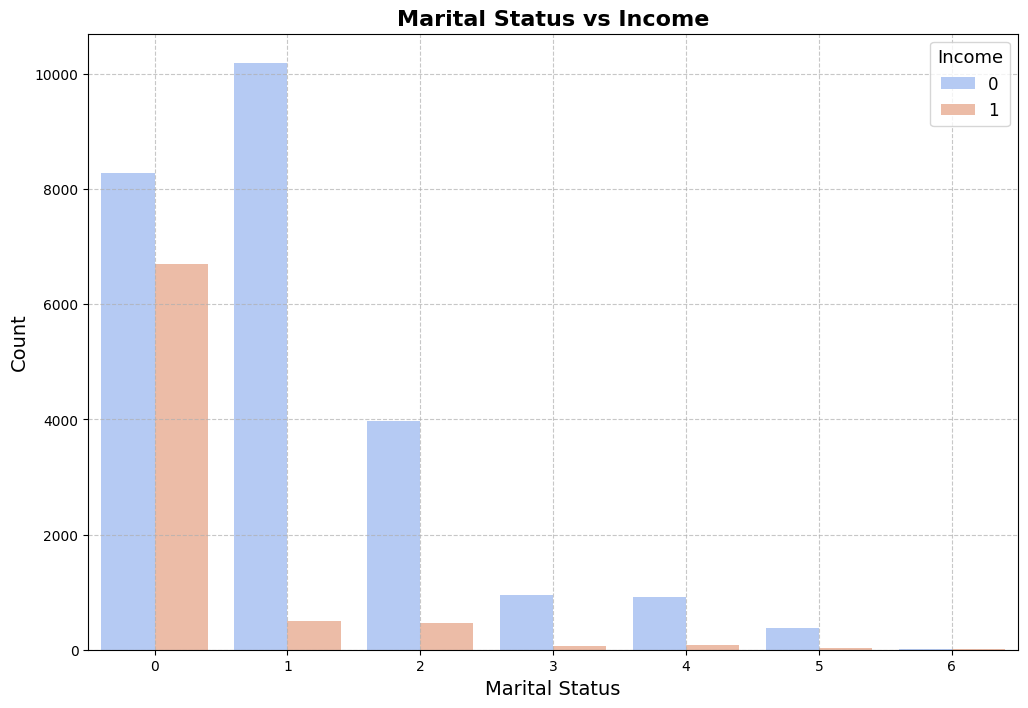

In [61]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Marital_status', hue='Income', data=df, palette='coolwarm')
plt.title('Marital Status vs Income', fontsize=16, fontweight='bold')
plt.xlabel('Marital Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Income', title_fontsize='13', fontsize='12')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


<ipython-input-62-42373fa3945f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Occupation', data=df, order=df['Occupation'].value_counts().index, palette='plasma')


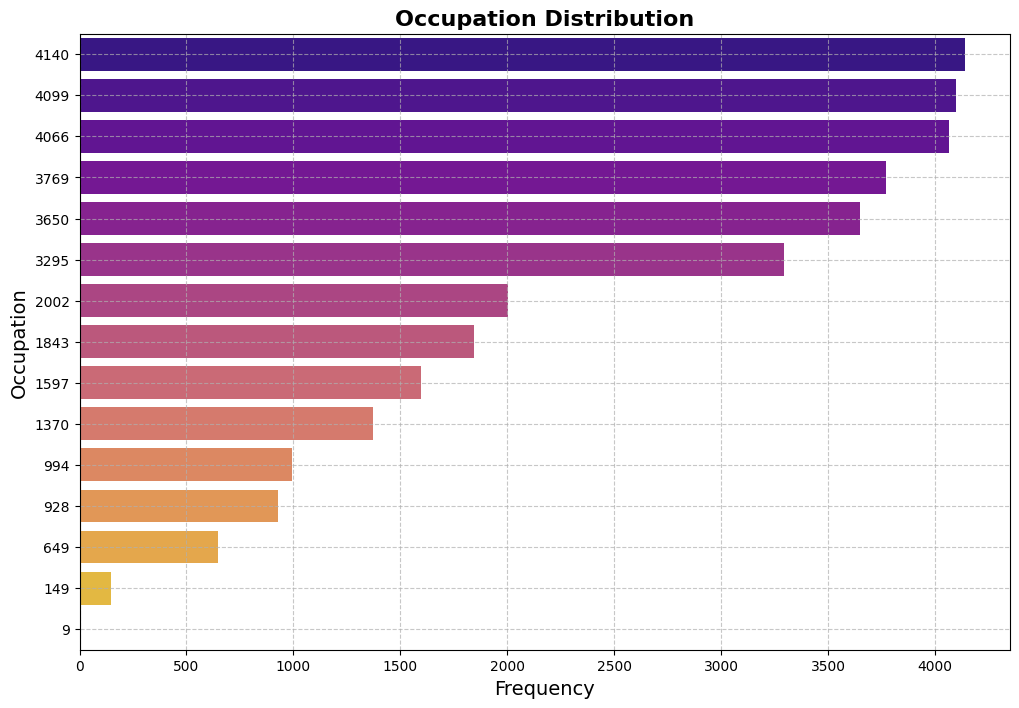

In [62]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Occupation', data=df, order=df['Occupation'].value_counts().index, palette='plasma')
plt.title('Occupation Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Occupation', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


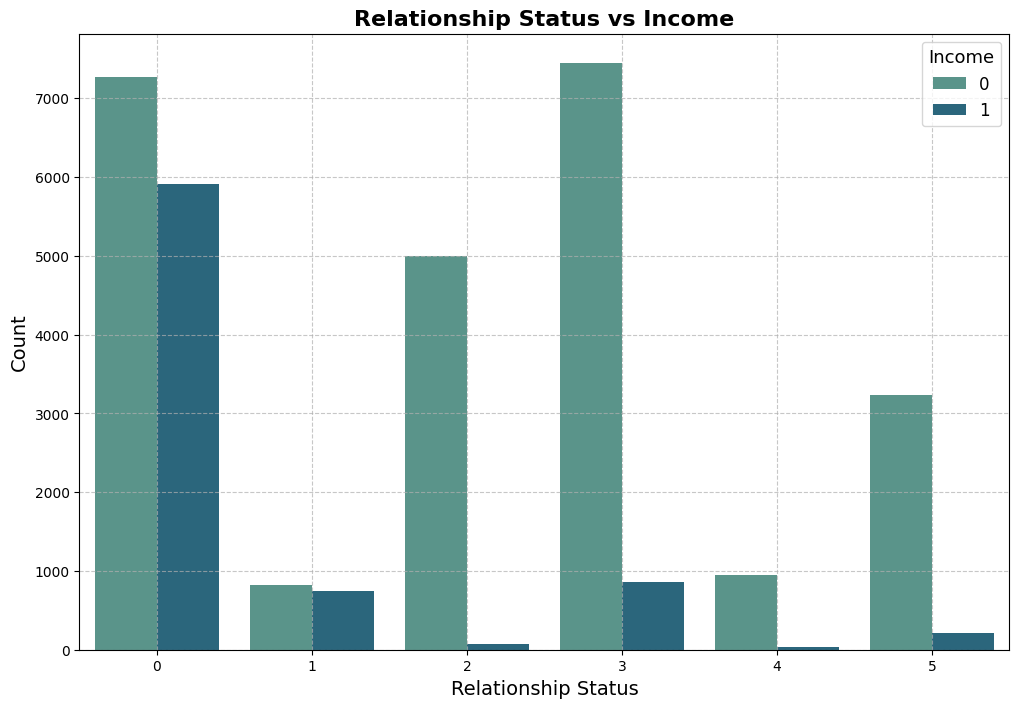

In [63]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Relationship', hue='Income', data=df, palette='crest')
plt.title('Relationship Status vs Income', fontsize=16, fontweight='bold')
plt.xlabel('Relationship Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Income', title_fontsize='13', fontsize='12')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


<ipython-input-64-dd324f7fd5a0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Income', y='Hours_per_week', data=df, palette='Set2')


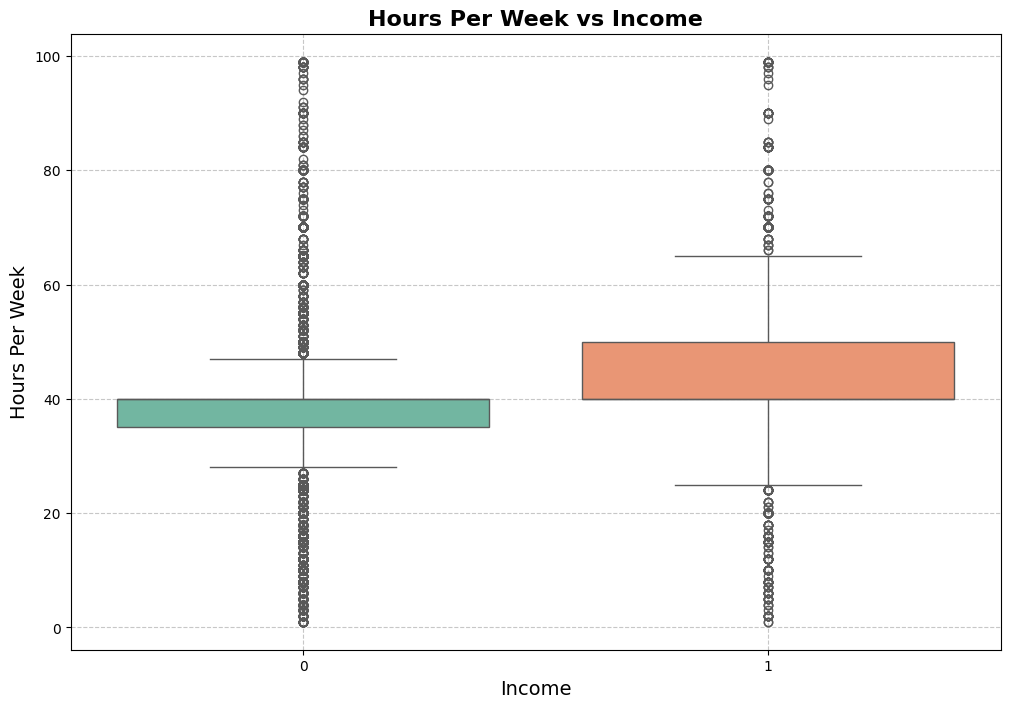

In [64]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Income', y='Hours_per_week', data=df, palette='Set2')
plt.title('Hours Per Week vs Income', fontsize=16, fontweight='bold')
plt.xlabel('Income', fontsize=14)
plt.ylabel('Hours Per Week', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


## Correlations

In [65]:
train_set.corr()

,Age,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_grouped,Continent
Age,1.000000,0.037584,0.030507,0.032523,-0.177342,-0.042416,-0.091600,0.078584,0.058234,0.068886,0.232150,-0.086133,-0.001061
Education_num,0.037584,1.000000,-0.104162,0.294100,-0.086575,-0.041863,-0.013369,0.125137,0.078465,0.144324,0.334847,-0.034032,0.039016
Marital_status,0.030507,-0.104162,1.000000,-0.019046,0.746325,0.072883,0.409039,-0.055519,-0.049829,-0.148893,-0.310590,-0.054676,0.009386
Occupation,0.032523,0.294100,-0.019046,1.000000,-0.008563,-0.033799,0.081436,0.060668,0.042640,0.055130,0.166510,0.215824,0.019359
Relationship,-0.177342,-0.086575,0.746325,-0.008563,1.000000,0.104872,0.515789,-0.072734,-0.073350,-0.161157,-0.385975,-0.034459,0.006273
Race,-0.042416,-0.041863,0.072883,-0.033799,0.104872,1.000000,0.070255,-0.007612,-0.019511,-0.032190,-0.068797,-0.039615,0.265949
Sex,-0.091600,-0.013369,0.409039,0.081436,0.515789,0.070255,1.000000,-0.050217,-0.045508,-0.231764,-0.218600,-0.079537,-0.009709
Capital_gain,0.078584,0.125137,-0.055519,0.060668,-0.072734,-0.007612,-0.050217,1.000000,-0.031833,0.078592,0.221956,0.021742,0.015322
Capital_loss,0.058234,0.078465,-0.049829,0.042640,-0.073350,-0.019511,-0.045508,-0.031833,1.000000,0.052869,0.145531,0.006538,0.008968
Hours_per_week,0.068886,0.144324,-0.148893,0.055130,-0.161157,-0.032190,-0.231764,0.078592,0.052869,1.000000,0.229240,0.145974,0.004925


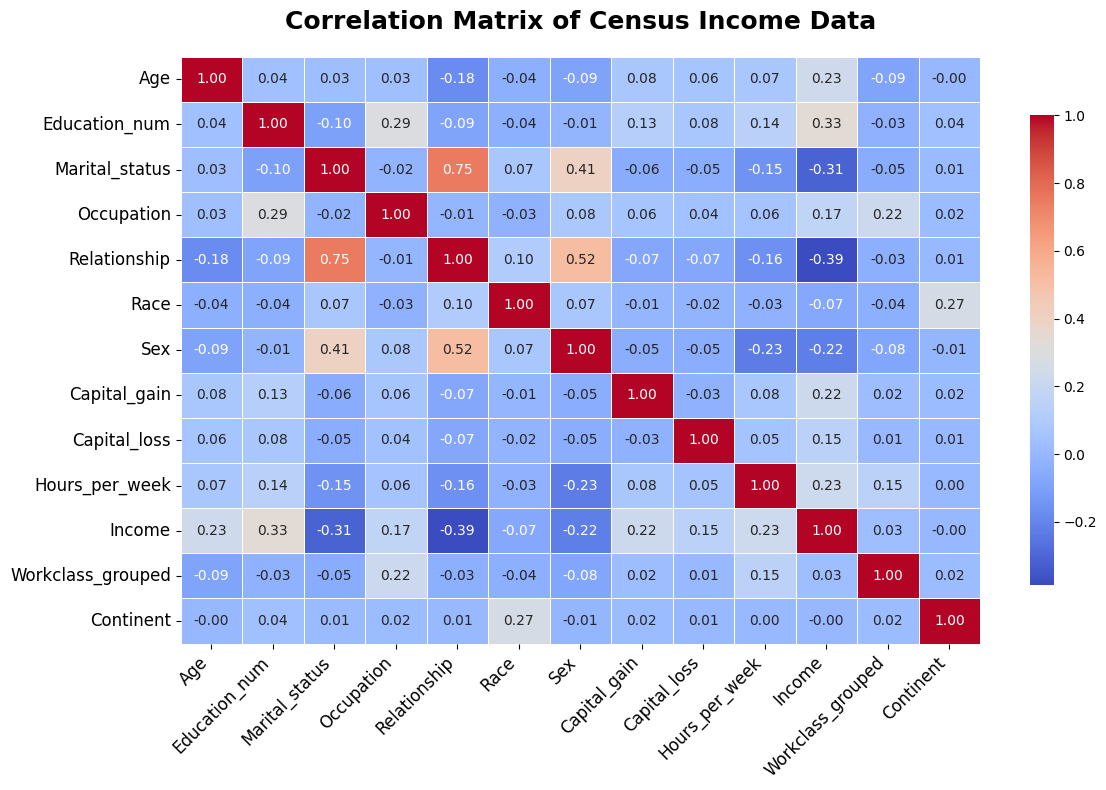

In [66]:
corr_matrix = train_set.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})

plt.title('Correlation Matrix of Census Income Data', fontsize=18, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

## Skewness

In [67]:
train_set.skew()

,0
Age,0.557962
Education_num,-0.319900
Marital_status,1.563145
Occupation,-0.932563
Relationship,0.407906
Race,3.528614
Sex,0.715348
Capital_gain,12.101971
Capital_loss,4.547981
Hours_per_week,0.240313


In [70]:
train_set['Capital_gain'] = np.log1p(train_set['Capital_gain'])
test_set['Capital_gain'] = np.log1p(test_set['Capital_gain'])

In [71]:
train_set['Capital_loss'] = np.log1p(train_set['Capital_loss'])
test_set['Capital_loss'] = np.log1p(test_set['Capital_loss'])

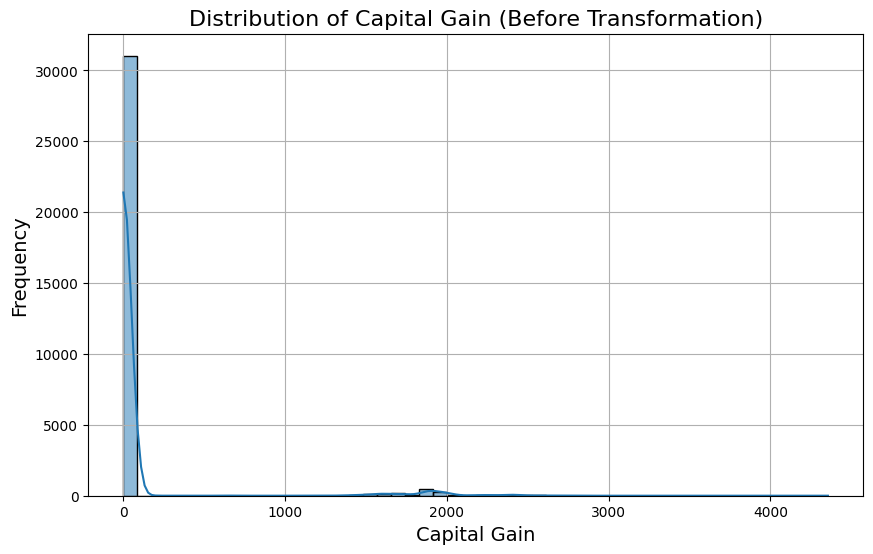

In [72]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Capital_loss'], kde=True, bins=50)
plt.title('Distribution of Capital Gain (Before Transformation)', fontsize=16)
plt.xlabel('Capital Gain', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

## Splitting into X_train, y_train, X_test, y_test

In [73]:
X_train = train_set.drop('Income', axis=1)
y_train = train_set['Income']
X_test = test_set.drop('Income', axis=1)
y_test = test_set['Income']

In [74]:
X_train.shape

(26048, 12)

In [75]:
X_train.shape

(26048, 12)

In [76]:
y_train.shape

(26048,)

In [77]:
y_test.shape

(6512,)

## Standard Scaling

In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## PCA

In [79]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.90)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

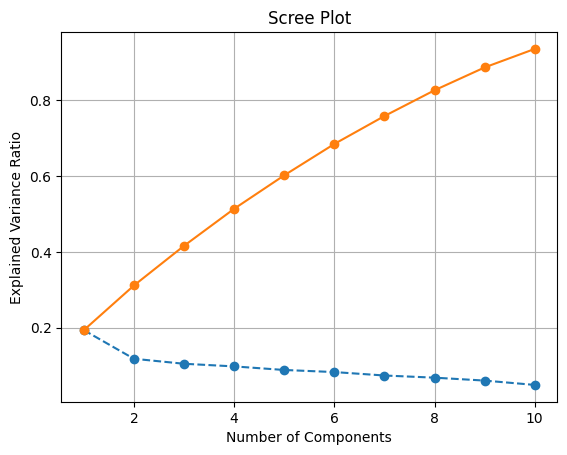

In [80]:
explained_variance_ratio_ = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio_)

plt.plot(range(1, len(explained_variance_ratio_) + 1), explained_variance_ratio_, marker='o', linestyle='--')
plt.plot(range(1, len(explained_variance_ratio_) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

## Model

We will be building a ANN model since the data is huge and complex. From the correlation matrix there is only one evident linear relationship i.e Age vs Income. Rest of the columns might have non-linear relationships for which a ANN model is great.

In [81]:
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

def lr_schedule(epoch, lr):
    initial_lr = 0.001
    decay = 0.1
    return initial_lr / (1 + decay * epoch)

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    verbose=1,
    restore_best_weights=True
)

model_checkpoint = ModelCheckpoint('best_model.keras',
                                    monitor='val_accuracy',
                                    save_best_only=True,
                                    mode='max')

lr_scheduler = LearningRateScheduler(lr_schedule, verbose=1)

In [82]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_pca.shape[1],)),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(32, activation='relu'),
    Dropout(0.25),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-7),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │           5,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 177,089 (691.75 KB)

 Trainable params: 175,809 (686.75 KB)

 Non-trainable params: 1,280 (5.00 KB)

In [83]:
history = model.fit(X_train_pca, y_train,
                    validation_split = 0.1,
                    epochs=100, batch_size=32, callbacks = [lr_scheduler, model_checkpoint, early_stopping])



Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/100
733/733 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7867 - loss: 0.4306 - val_accuracy: 0.8276 - val_loss: 0.3480 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0009090909090909091.
Epoch 2/100
733/733 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8358 - loss: 0.3597 - val_accuracy: 0.8330 - val_loss: 0.3359 - learning_rate: 9.0909e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0008333333333333334.
Epoch 3/100
733/733 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8314 - loss: 0.3539 - val_accuracy: 0.8430 - val_loss: 0.3357 - learning_rate: 8.3333e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0007692307692307692.
Epoch 4/100
733/733 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8409 - loss: 0.3407 - val_accuracy: 0.8418 - val_loss: 0.3339 - learning_rate: 7.6923e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.0007142857

In [84]:
test_loss, test_accuracy = model.evaluate(X_test_pca, y_test)

print(f'Test Accuracy: {test_accuracy:.4f}')


204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8478 - loss: 0.3264
Test Accuracy: 0.8512


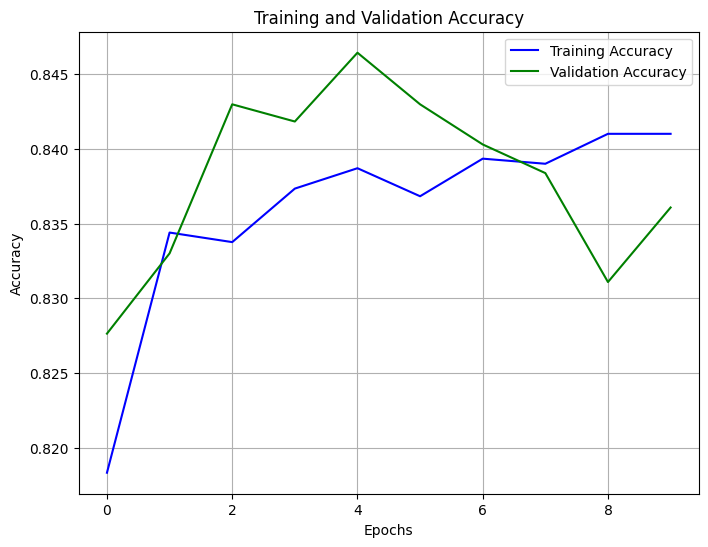

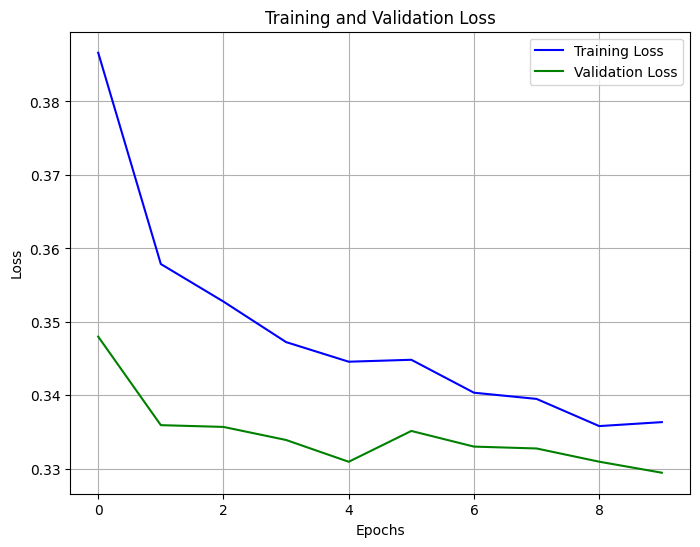

In [85]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='green')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


## Conclusion

We are getting a Testing Accuracy of around 85%.